In [1]:
import pandas as pd 

# Read the dataset with name "Fake_Real_data.csv" and store it in a varaible df

df=pd.read_csv('Fake_Real_Data.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df.shape

(9900, 2)

In [4]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [5]:
df["label_num"]=df['label'].map({'Fake':1,"Real":0})

In [7]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0


In [9]:
import spacy 
nlp = spacy.load('en_core_web_lg')

In [11]:
doc = nlp(" Top Trump Surrogate BRUTALLY stabd Hi")
doc.vector.shape

(300,)

In [12]:
df['vector']=df['Text'].apply(lambda text:nlp(text).vector)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df["vector"]
y=df['label_num']
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=2022,stratify=y,test_size=0.2)


In [18]:
X_train[0].shape

(300,)

In [19]:
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train_2d)
scaled_X_test=scaler.transform(X_test_2d)




model =MultinomialNB()
model.fit(scaled_X_train,y_train)

MultinomialNB()

In [23]:
y_pred=model.predict(scaled_X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",round(acc,2))

clf=classification_report(y_test,y_pred)
print('Classification Report :\n\n ',clf)

con_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",con_mat)

Accuracy score :  0.94
Classification Report :

                precision    recall  f1-score   support

           0       0.93      0.94      0.94       980
           1       0.94      0.93      0.94      1000

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980

Confusion matrix : 
 [[922  58]
 [ 68 932]]


In [33]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import MinMaxScaler

#scaler=MinMaxScaler()
#scaled_X_train=scaler.fit_transform(X_train_2d)
#scaled_X_test=scaler.transform(X_test_2d)




model =KNeighborsClassifier()
model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred=model.predict(scaled_X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",round(acc,2))

clf=classification_report(y_test,y_pred)
print('Classification Report :\n\n ',clf)

con_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",con_mat)

Accuracy score :  0.99
Classification Report :

                precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

Confusion matrix : 
 [[979   1]
 [ 15 985]]


<AxesSubplot:>

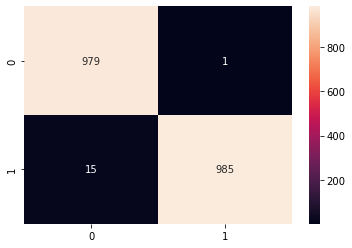

In [36]:
import seaborn as sns
sns.heatmap(con_mat,fmt="d",annot=True)

In [37]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import MinMaxScaler

#scaler=MinMaxScaler()
#scaled_X_train=scaler.fit_transform(X_train_2d)
#scaled_X_test=scaler.transform(X_test_2d)




model =RandomForestClassifier()
model.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred=model.predict(scaled_X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",round(acc,2))

clf=classification_report(y_test,y_pred)
print('Classification Report :\n\n ',clf)

con_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",con_mat)

Accuracy score :  0.99
Classification Report :

                precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

Confusion matrix : 
 [[977   3]
 [ 21 979]]


<AxesSubplot:>

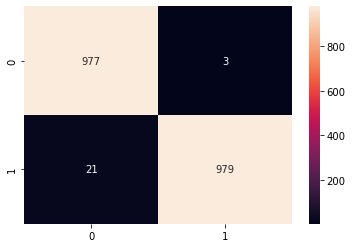

In [40]:
import seaborn as sns
sns.heatmap(con_mat,fmt="d",annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [45]:
from sklearn.svm import SVC

#from sklearn.ensemble import RandomForestClassifier

#from sklearn.preprocessing import MinMaxScaler

#scaler=MinMaxScaler()
#scaled_X_train=scaler.fit_transform(X_train_2d)
#scaled_X_test=scaler.transform(X_test_2d)




model =SVC()
model.fit(scaled_X_train,y_train)

SVC()

In [46]:
y_pred=model.predict(scaled_X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",round(acc,2))

clf=classification_report(y_test,y_pred)
print('Classification Report :\n\n ',clf)

con_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",con_mat)

Accuracy score :  1.0
Classification Report :

                precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

Confusion matrix : 
 [[980   0]
 [  4 996]]


<AxesSubplot:>

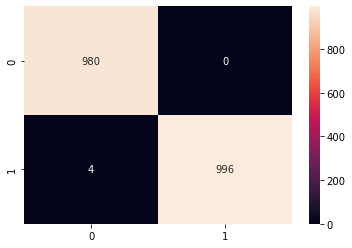

In [48]:
import seaborn as sns
sns.heatmap(con_mat,fmt="d",annot=True)

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",round(acc,2))

clf=classification_report(y_test,y_pred)
print('Classification Report :\n\n ',clf)

con_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",con_mat)

Accuracy score :  1.0
Classification Report :

                precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

Confusion matrix : 
 [[980   0]
 [  4 996]]
